In [8]:
import pandas as pd
from scripts.helpers import get_list_from_string_dict

from tqdm import tqdm

tqdm.pandas()

In [10]:
column_names = [
    'wikipedia_id', 'freebase_id', 'name', 'release_date',
    'box_office_revenue', 'runtime', 'languages', 'countries', 'genres'
]

metadata_df = pd.read_table('data/raw/movie.metadata.tsv', names=column_names)
metadata_df.head()

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [11]:
metadata_df['release_year'] = pd.to_datetime(metadata_df['release_date'], errors='coerce')
metadata_df.drop(columns='release_date', inplace=True)
metadata_df.dropna(subset=['release_year'], inplace=True)
metadata_df['release_year'] = metadata_df['release_year'].dt.year.astype(int)

metadata_df.head()

,wikipedia_id,freebase_id,name,box_office_revenue,runtime,languages,countries,genres,release_year
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983


In [12]:
metadata_df.drop(columns=['box_office_revenue', 'runtime'], inplace=True)

In [13]:
metadata_df['genres'] = metadata_df.genres.progress_apply(get_list_from_string_dict)
metadata_df['languages'] = metadata_df.languages.progress_apply(get_list_from_string_dict)
metadata_df['countries'] = metadata_df.countries.progress_apply(get_list_from_string_dict)

metadata_df[['genres', 'languages', 'countries']].head()

100%|██████████| 74838/74838 [00:00<00:00, 246045.14it/s]


,genres,languages,countries
0,"[Thriller, Science Fiction, Horror, Adventure,...",[English Language],[United States of America]
1,"[Mystery, Biographical film, Drama, Crime Drama]",[English Language],[United States of America]
2,"[Crime Fiction, Drama]",[Norwegian Language],[Norway]
3,"[Thriller, Erotic thriller, Psychological thri...",[English Language],[United Kingdom]
4,[Drama],[German Language],[Germany]


In [15]:
imdb_basics_df = pd.read_csv('data/raw/title.basics.tsv', sep='\t', low_memory=False)

imdb_basics_df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [16]:
imdb_ratings_df = pd.read_csv('data/raw/title.ratings.tsv', sep='\t')

imdb_ratings_df.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,269
2,tt0000003,6.5,1912
3,tt0000004,5.5,178
4,tt0000005,6.2,2692


In [17]:
imdb_basics_df = imdb_basics_df[imdb_basics_df.titleType == 'movie']
imdb_basics_df = imdb_basics_df[['tconst', 'originalTitle', 'startYear']]

imdb_df = pd.merge(imdb_basics_df, imdb_ratings_df, on='tconst', how='inner')

imdb_df.head(5)

,tconst,originalTitle,startYear,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,5.3,207
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,5.3,484
2,tt0000502,Bohemios,1905,4.1,15
3,tt0000574,The Story of the Kelly Gang,1906,6.0,855
4,tt0000591,L'enfant prodigue,1907,5.0,21


In [19]:
plot_column_names = ['wikipedia_id', 'plot']
plot_df = pd.read_csv('data/raw/plot_summaries.txt', sep="\t", names=plot_column_names)

plot_df.head(5)

,wikipedia_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [20]:
imdb_df.head(5)

imdb_df.rename(
    columns={
        'originalTitle': 'name',
        'startYear': 'release_year',
        'averageRating': 'rating',
        'numVotes': 'num_votes'
    },
    inplace=True
)

imdb_df.release_year = pd.to_numeric(imdb_df.release_year, errors='coerce', downcast='integer')
imdb_df.dropna(subset='release_year', inplace=True)

imdb_df.name = imdb_df.name.astype(str)

In [21]:
movies_plots_df = pd.merge(plot_df, metadata_df, on='wikipedia_id', how='inner')

movies_plots_df.head(5)

,wikipedia_id,plot,freebase_id,name,languages,countries,genres,release_year
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",/m/076w2lb,Taxi Blues,[Russian Language],"[France, Soviet Union, Russia]","[Drama, World cinema]",1990
1,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,[English Language],[United States of America],"[Action/Adventure, Science Fiction, Action, Dr...",2012
2,20663735,Poovalli Induchoodan is sentenced for six yea...,/m/051zjwb,Narasimham,[Malayalam Language],[India],"[Musical, Action, Drama, Bollywood]",2000
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",/m/06xtz3,The Lemon Drop Kid,[English Language],[United States of America],"[Screwball comedy, Comedy]",1951
4,595909,Seventh-day Adventist Church pastor Michael Ch...,/m/02tqm5,A Cry in the Dark,[English Language],"[United States of America, Australia, New Zeal...","[Crime Fiction, Drama, Docudrama, World cinema...",1988


In [22]:
movies_plots_df.drop_duplicates(subset=['name', 'release_year'], keep=False, inplace=True)
imdb_df.drop_duplicates(subset=['name', 'release_year'], keep=False, inplace=True)

In [23]:
# let's create lowercase titles for merging
movies_plots_df['name_lowercase'] = movies_plots_df.name.str.lower()
imdb_df['name_lowercase'] = imdb_df.name.str.lower()

# let's now merge
df = pd.merge(imdb_df, movies_plots_df, on=['name_lowercase', 'release_year'], how='inner')

# and now deal with lowecase names
df.drop(columns=['name_lowercase', 'name_y'], inplace=True)
df.rename(columns={'name_x': 'name'}, inplace=True)

print(df.shape)
df.head(5)

(22394, 11)


,tconst,name,release_year,rating,num_votes,wikipedia_id,plot,freebase_id,languages,countries,genres
0,tt0000009,Miss Jerry,1894,5.3,207,10109752,After finding out that her father is suffering...,/m/02q23xk,[Silent film],[United States of America],"[Short Film, Silent film, Indie, Black-and-white]"
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,5.3,484,28703057,The film no longer exists in its entirety; how...,/m/0czdh_n,[],[],[Sports]
2,tt0000574,The Story of the Kelly Gang,1906,6.0,855,142995,The Story of the Kelly Gangs tone is of sorrow...,/m/0120y4,[English Language],[Australia],"[Crime Fiction, Silent film, Biography, Indie,..."
3,tt0000615,Robbery Under Arms,1907,4.3,25,32986669,Key scenes of the film included the branding o...,/m/04p7yxx,[Silent film],[Australia],"[Silent film, Drama]"
4,tt0001530,"Captain Midnight, the Bush King",1911,5.4,18,32987200,Edgar Dalimore is the son of wealthy station o...,/m/0h569x9,[Silent film],[],[Silent film]


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22394 entries, 0 to 22393
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tconst        22394 non-null  object 
 1   name          22394 non-null  object 
 2   release_year  22394 non-null  int16  
 3   rating        22394 non-null  float64
 4   num_votes     22394 non-null  int64  
 5   wikipedia_id  22394 non-null  int64  
 6   plot          22394 non-null  object 
 7   freebase_id   22394 non-null  object 
 8   languages     22394 non-null  object 
 9   countries     22394 non-null  object 
 10  genres        22394 non-null  object 
dtypes: float64(1), int16(1), int64(2), object(7)
memory usage: 1.9+ MB


In [25]:
from collections import Counter
import itertools

In [27]:
genres_counter = Counter(itertools.chain.from_iterable(df.genres))
genres_counter = dict(genres_counter)

genres_counter

{'Short Film': 61,
 'Silent film': 459,
 'Indie': 2444,
 'Black-and-white': 2393,
 'Sports': 454,
 'Crime Fiction': 2964,
 'Biography': 409,
 'Drama': 11491,
 'Biographical film': 406,
 'Fantasy': 1052,
 'LGBT': 505,
 'Comedy': 6287,
 'Adventure': 2073,
 "Children's/Family": 350,
 "Children's Fantasy": 118,
 'Family Film': 1313,
 'Family-Oriented Adventure': 134,
 'Documentary': 458,
 'Christian film': 76,
 'Epic': 148,
 'Western': 761,
 'Romantic comedy': 1572,
 'Romantic drama': 1736,
 'Romance Film': 4489,
 'Slapstick': 341,
 'Thriller': 4241,
 'Crime Thriller': 1214,
 'Costume drama': 275,
 'War film': 970,
 'Horror': 2153,
 'B-Western': 17,
 'Comedy film': 711,
 'Biopic [feature]': 258,
 'Mystery': 1493,
 'Action': 3639,
 'Spy': 273,
 'Melodrama': 361,
 'Combat Films': 73,
 'Propaganda film': 33,
 'Jungle Film': 50,
 'Gangster Film': 236,
 'Comedy-drama': 924,
 'Film adaptation': 983,
 'Political drama': 331,
 'Crime Drama': 275,
 'Comedy of manners': 161,
 'Satire': 386,
 'World 

In [28]:
len(genres_counter.keys())

347

In [29]:
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh_wordcloud2 import WordCloud2

In [30]:
wordcloud_data = [[k, v] for k, v in genres_counter.items()]
names, weights = zip(*wordcloud_data)

In [32]:
test1 = ColumnDataSource({'names': names, 'weights': weights})
# we will specify just "blue" for the color
wordcloud = WordCloud2(source=test1, wordCol="names", sizeCol="weights", color="blue")
show(wordcloud)

UnsetValueError: WordCloud2(id='p1008', ...).weightFactor doesn't have a value set

In [35]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

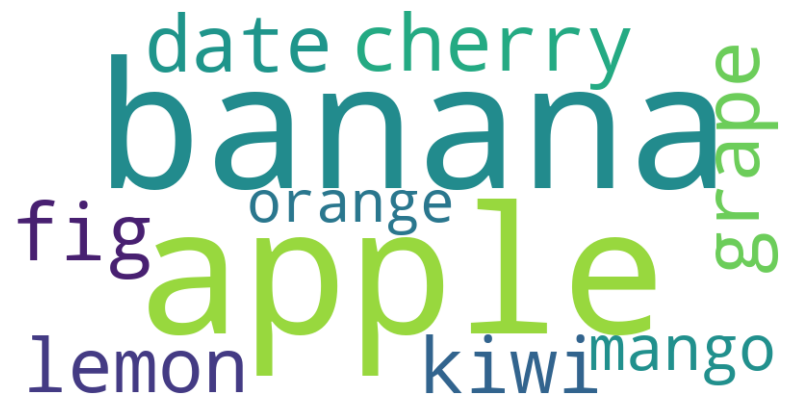

In [36]:
words = ["apple", "banana", "cherry", "date", "fig", "grape", "kiwi", "lemon", "mango", "orange"]

# Convert the list of words to a string
text = " ".join(words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

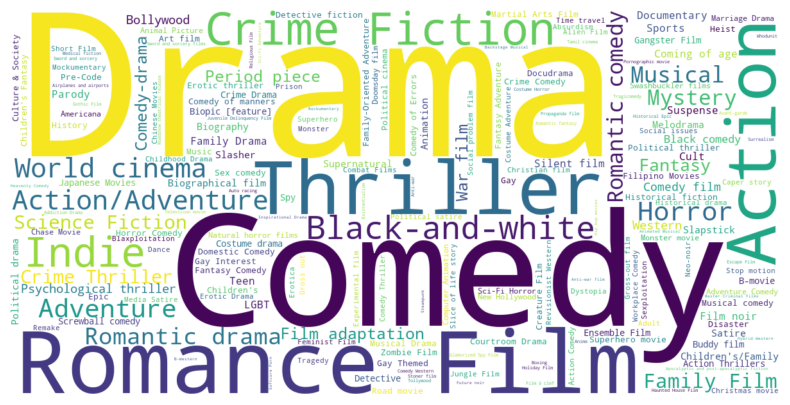

In [42]:
# Create a WordCloud object with frequency-based sizing
wordcloud = WordCloud(width=1200, height=600, background_color='white')

# Generate the word cloud with the provided frequencies
wordcloud.generate_from_frequencies(genres_counter)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.png", dpi=300)
plt.show()
